In [ ]:
!pip install web3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Historical data from binance

In this section we define a function to request historical data from Binance for a variety of frequencies ("1m", "5m", "10m", "15m", "1h", "6h", "12h", "1d"). We set initial_date = '31 Mar 2021' but we can change it.
[I use my private api keys]

In [ ]:
!pip install python-binance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.1 MB/s 
     |████████████████████████████████| 45 kB 2.2 MB/s 
     |████████████████████████████████| 288 kB 17.1 MB/s 
     |████████████████████████████████| 749 kB 8.1 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [ ]:
import pandas as pd
import math
import os.path
import time
from binance.client import Client
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm_notebook #(Optional, used for progress-bars)

### API
binance_api_key = '9zFIgetckRO80d4RciWs8jc4XSwAMEnFIuwVhAoaYIstQ9RWlfqiV6zcAGu0Ta8R'    #Enter your own API-key here
binance_api_secret = 'Uu8vtNEmH1PPDPDchX51jivxBENEbNwDmDcQrnhPJBJwFcbqjnvxL2MeQJuTc4Kg' #Enter your own API-secret here

### CONSTANTS
binsizes = {"1m": 1, "5m": 5, "10m": 10, "15m": 15, "1h": 60, "6h": 360, "12h": 720, "1d": 1440}

batch_size = 750
binance_client = Client(api_key=binance_api_key, api_secret=binance_api_secret)

# initial_date = '1 Jan 2017'
initial_date = '31 Mar 2021'
### FUNCTIONS
def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "binance": old = datetime.strptime(initial_date, '%d %b %Y')
    if source == "binance": new = pd.to_datetime(binance_client.get_klines(symbol=symbol, interval=kline_size)[-1][0], unit='ms')
    return old, new

def get_all_binance(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime(initial_date, '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_klines(symbol, kline_size, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df


We request historical data for ETHUSDC with 5m frequency.

In [ ]:
# lista = ["ETHUSDC"]

# BTC ETH MATIC UNI COMP AAVE YFI CRV MKR LINK KP3R SFI SUSHI 1INCH CAKE 
symbol = "ETHUSDC"
# Frecuencia: 1m, 5m, 10m, 15m, 1h, 1d, 1m
freq = "5m"

# Descarga de datos
ETH_historical = get_all_binance(symbol, freq, save = True)

All caught up..!


In [ ]:
len(ETH_historical)

131277

In [ ]:
ETH_historical

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2021-03-31 00:00:00,1841.29000000,1845.35000000,1841.12000000,1845.35000000,13.45650000,1617149099999,24811.47621960,39,4.46207000,8228.10868710,0
2021-03-31 00:05:00,1844.39000000,1847.08000000,1843.99000000,1846.29000000,54.69818000,1617149399999,100898.41600010,50,18.71127000,34521.30106140,0
2021-03-31 00:10:00,1845.54000000,1849.53000000,1845.54000000,1848.96000000,10.56434000,1617149699999,19523.84183440,31,6.35202000,11739.72432620,0
2021-03-31 00:15:00,1848.96000000,1850.35000000,1847.50000000,1847.50000000,126.93107000,1617149999999,234808.65135190,117,70.35710000,130155.06817220,0
2021-03-31 00:20:00,1848.12000000,1849.12000000,1846.00000000,1846.00000000,16.03979000,1617150299999,29631.68322550,61,3.04496000,5630.11817930,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 09:00:00,1047.77000000,1049.73000000,1043.93000000,1044.98000000,89.34740000,1656579899999,93600.59516200,286,41.33610000,43316.53086700,0
2022-06-30 09:05:00,1044.86000000,1045.89000000,1027.01000000,1031.05000000,1255.30980000,1656580199999,1301546.44966900,1255,531.65880000,552359.80033400,0
2022-06-30 09:10:00,1031.04000000,1034.60000000,1027.18000000,1031.57000000,657.32350000,1656580499999,677439.13450400,867,226.92000000,234032.62150300,0


Given that we have too much data, we will stay with less data (say 2000 prices).

In [ ]:
P_ETH = ETH_historical[-2000:]['close']
for i in range(len(P_ETH)):
  P_ETH[i] = float(P_ETH[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


## LTV calculator

Given

- $A=collateral$
- $D=borrowed\_capital / debt$
- $LTV=Loan\ to\ value$
- $LT$ liquidation threshold

then $LTV = \frac{D}{A}$ and we will be liquidated if $LTV > LT$.

In [ ]:
def liquidation(collateral_ETH, P_ETH, Debt_USDC, LT):
  '''
  LT = liquidation threshold
  debt_value = Debt_USDC (in USDC)
  collateral_USDC = colateral_ETH * P_ETH
  liquidation if debt_value > collateral_USDC * LT iff debt_value / collateral_USDC = new_LTV > LT
  '''
  collateral_USDC = collateral_ETH * P_ETH
  new_LTV = Debt_USDC / collateral_USDC
  return new_LTV > LT

def LTV_(collateral_ETH, P_ETH, Debt_USDC):
  collateral_USDC = collateral_ETH * P_ETH
  LTV = Debt_USDC / collateral_USDC
  # P_ETH = Debt_USDC / (collateral_ETH * LT)
  return LTV

## PyL DyDx

In [ ]:
def short_pyl(size, P):
  '''
  P_entry, leverage are given and fixed
  '''
  return size * (short_entry_price - P) * short_leverage

## AAVE yields

In [ ]:
def AAVE_profits(collateral_USDC, pcg_collateral_to_borrow,
                 supply_rate_ETH, supply_rewards_rate_ETH,
                 borrow_rate_USDC, borrow_rewards_rate_USDC):
  debt = collateral_USDC * pcg_collateral_to_borrow
  return collateral_USDC * (supply_rate_ETH + supply_rewards_rate_ETH) - debt * (borrow_rate_USDC - borrow_rewards_rate_USDC)

### Request borrow_rate + supply_rate

In [ ]:
import json
#from google.colab import files
#uploaded = files.upload()
from binance.client import Client
import pandas as pd
from datetime import datetime
from web3 import Web3
#import pandas as pd


In [ ]:
# Conectamos con el nodo
w3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/da48e8cbe7ed479688437e27dd07fe8b"))
# Cargamos las address del contrato del tricrypto y del LP token
lending_pool_address = '0x7d2768dE32b0b80b7a3454c06BdAc94A69DDc7A9'
wETH_address = '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2'
USDC_address = '0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
# Cargamos las abis de cada uno
pool_abi = '''
[{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":false,"internalType":"address","name":"user","type":"address"},{"indexed":true,"internalType":"address","name":"onBehalfOf","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"borrowRateMode","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"borrowRate","type":"uint256"},{"indexed":true,"internalType":"uint16","name":"referral","type":"uint16"}],"name":"Borrow","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":false,"internalType":"address","name":"user","type":"address"},{"indexed":true,"internalType":"address","name":"onBehalfOf","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"},{"indexed":true,"internalType":"uint16","name":"referral","type":"uint16"}],"name":"Deposit","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"target","type":"address"},{"indexed":true,"internalType":"address","name":"initiator","type":"address"},{"indexed":true,"internalType":"address","name":"asset","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"premium","type":"uint256"},{"indexed":false,"internalType":"uint16","name":"referralCode","type":"uint16"}],"name":"FlashLoan","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"collateralAsset","type":"address"},{"indexed":true,"internalType":"address","name":"debtAsset","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"},{"indexed":false,"internalType":"uint256","name":"debtToCover","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"liquidatedCollateralAmount","type":"uint256"},{"indexed":false,"internalType":"address","name":"liquidator","type":"address"},{"indexed":false,"internalType":"bool","name":"receiveAToken","type":"bool"}],"name":"LiquidationCall","type":"event"},{"anonymous":false,"inputs":[],"name":"Paused","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"}],"name":"RebalanceStableBorrowRate","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"},{"indexed":true,"internalType":"address","name":"repayer","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"Repay","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":false,"internalType":"uint256","name":"liquidityRate","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"stableBorrowRate","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"variableBorrowRate","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"liquidityIndex","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"variableBorrowIndex","type":"uint256"}],"name":"ReserveDataUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"}],"name":"ReserveUsedAsCollateralDisabled","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"}],"name":"ReserveUsedAsCollateralEnabled","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"},{"indexed":false,"internalType":"uint256","name":"rateMode","type":"uint256"}],"name":"Swap","type":"event"},{"anonymous":false,"inputs":[],"name":"Unpaused","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"Withdraw","type":"event"},{"inputs":[],"name":"FLASHLOAN_PREMIUM_TOTAL","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"LENDINGPOOL_REVISION","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"MAX_NUMBER_RESERVES","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"MAX_STABLE_RATE_BORROW_SIZE_PERCENT","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"uint256","name":"interestRateMode","type":"uint256"},{"internalType":"uint16","name":"referralCode","type":"uint16"},{"internalType":"address","name":"onBehalfOf","type":"address"}],"name":"borrow","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"address","name":"onBehalfOf","type":"address"},{"internalType":"uint16","name":"referralCode","type":"uint16"}],"name":"deposit","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"uint256","name":"balanceFromBefore","type":"uint256"},{"internalType":"uint256","name":"balanceToBefore","type":"uint256"}],"name":"finalizeTransfer","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"receiverAddress","type":"address"},{"internalType":"address[]","name":"assets","type":"address[]"},{"internalType":"uint256[]","name":"amounts","type":"uint256[]"},{"internalType":"uint256[]","name":"modes","type":"uint256[]"},{"internalType":"address","name":"onBehalfOf","type":"address"},{"internalType":"bytes","name":"params","type":"bytes"},{"internalType":"uint16","name":"referralCode","type":"uint16"}],"name":"flashLoan","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"getAddressesProvider","outputs":[{"internalType":"contract ILendingPoolAddressesProvider","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"}],"name":"getConfiguration","outputs":[{"components":[{"internalType":"uint256","name":"data","type":"uint256"}],"internalType":"struct DataTypes.ReserveConfigurationMap","name":"","type":"tuple"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"}],"name":"getReserveData","outputs":[{"components":[{"components":[{"internalType":"uint256","name":"data","type":"uint256"}],"internalType":"struct DataTypes.ReserveConfigurationMap","name":"configuration","type":"tuple"},{"internalType":"uint128","name":"liquidityIndex","type":"uint128"},{"internalType":"uint128","name":"variableBorrowIndex","type":"uint128"},{"internalType":"uint128","name":"currentLiquidityRate","type":"uint128"},{"internalType":"uint128","name":"currentVariableBorrowRate","type":"uint128"},{"internalType":"uint128","name":"currentStableBorrowRate","type":"uint128"},{"internalType":"uint40","name":"lastUpdateTimestamp","type":"uint40"},{"internalType":"address","name":"aTokenAddress","type":"address"},{"internalType":"address","name":"stableDebtTokenAddress","type":"address"},{"internalType":"address","name":"variableDebtTokenAddress","type":"address"},{"internalType":"address","name":"interestRateStrategyAddress","type":"address"},{"internalType":"uint8","name":"id","type":"uint8"}],"internalType":"struct DataTypes.ReserveData","name":"","type":"tuple"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"}],"name":"getReserveNormalizedIncome","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"}],"name":"getReserveNormalizedVariableDebt","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getReservesList","outputs":[{"internalType":"address[]","name":"","type":"address[]"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"user","type":"address"}],"name":"getUserAccountData","outputs":[{"internalType":"uint256","name":"totalCollateralETH","type":"uint256"},{"internalType":"uint256","name":"totalDebtETH","type":"uint256"},{"internalType":"uint256","name":"availableBorrowsETH","type":"uint256"},{"internalType":"uint256","name":"currentLiquidationThreshold","type":"uint256"},{"internalType":"uint256","name":"ltv","type":"uint256"},{"internalType":"uint256","name":"healthFactor","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"user","type":"address"}],"name":"getUserConfiguration","outputs":[{"components":[{"internalType":"uint256","name":"data","type":"uint256"}],"internalType":"struct DataTypes.UserConfigurationMap","name":"","type":"tuple"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"aTokenAddress","type":"address"},{"internalType":"address","name":"stableDebtAddress","type":"address"},{"internalType":"address","name":"variableDebtAddress","type":"address"},{"internalType":"address","name":"interestRateStrategyAddress","type":"address"}],"name":"initReserve","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"contract ILendingPoolAddressesProvider","name":"provider","type":"address"}],"name":"initialize","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"collateralAsset","type":"address"},{"internalType":"address","name":"debtAsset","type":"address"},{"internalType":"address","name":"user","type":"address"},{"internalType":"uint256","name":"debtToCover","type":"uint256"},{"internalType":"bool","name":"receiveAToken","type":"bool"}],"name":"liquidationCall","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"paused","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"user","type":"address"}],"name":"rebalanceStableBorrowRate","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"uint256","name":"rateMode","type":"uint256"},{"internalType":"address","name":"onBehalfOf","type":"address"}],"name":"repay","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"configuration","type":"uint256"}],"name":"setConfiguration","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"bool","name":"val","type":"bool"}],"name":"setPause","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"rateStrategyAddress","type":"address"}],"name":"setReserveInterestRateStrategyAddress","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"bool","name":"useAsCollateral","type":"bool"}],"name":"setUserUseReserveAsCollateral","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"rateMode","type":"uint256"}],"name":"swapBorrowRateMode","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"address","name":"to","type":"address"}],"name":"withdraw","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"}]
'''

In [ ]:
# Info del pool
# Conectamos con los contratos
pool_contract = w3.eth.contract(address=lending_pool_address, abi=pool_abi)

USDC_reserve_data=pool_contract.functions['getReserveData'](USDC_address).call()
USDC_liquidity_index = USDC_reserve_data[1] / 10**18
USDC_variable_borrow_index = USDC_reserve_data[2] / 10**18
USDC_liquidity_rate = USDC_reserve_data[3] / 10**27
USDC_variable_borrow_rate = USDC_reserve_data[4] / 10**27
USDC_stable_borrow_rate = USDC_reserve_data[5] / 10**27
wETH_reserve_data=pool_contract.functions['getReserveData'](wETH_address).call()
wETH_liquidity_index = wETH_reserve_data[1] / 10**18
wETH_variable_borrow_index = wETH_reserve_data[2] / 10**18
wETH_liquidity_rate = wETH_reserve_data[3] / 10**27
wETH_variable_borrow_rate = wETH_reserve_data[4] / 10**27
wETH_stable_borrow_rate = wETH_reserve_data[5] / 10**27

## Strategy


1. Use the staked ETH to borrow 10% USDC from Aave (For example, $1000 worth of ETH staked to take out 100 USDC)



2. Use the USDC to open a short position (preferably stop limit) on DyDx with 10x leverage (10 x 10 = 100% of staked ETH amount)


3. Find a threshold to keep cashing out the short profit and adding it back to the collateral to prevent liquidation (Max borrow amount on Aave is 80%)

In [ ]:
P_ETH[0]

1109.81

In [ ]:
# we set initial values

# ETH price at time of borrowing
P_ETH_0 = P_ETH[0]
# 
staked_ETH = 100
collateral_ETH_0 = staked_ETH 
pcg_collateral_to_borrow = 0.1
USDC_borrowed = (collateral_ETH_0 * P_ETH_0 ) * pcg_collateral_to_borrow


# DyDx parameters
# floor_price = max(list(P_ETH))*0.85
floor_price = 1000
# We set the short_entry_price 1% above floor_price (CHANGEABLE)
short_entry_price = floor_price * 1.01
# We set the stop limit 3% above (and higher than the entry_price) floor_price (CHANGEABLE)
stop_limit = floor_price * 1.03
#
short_size_0 = USDC_borrowed
short_leverage = 10


# AAVE parameters 
# Rates (We should bring these values from the smart contract)
USDC_reserve_data=pool_contract.functions['getReserveData'](USDC_address).call()
wETH_reserve_data=pool_contract.functions['getReserveData'](wETH_address).call()
supply_rate_ETH = wETH_reserve_data[3] / 10**27
borrow_rate_USDC = USDC_reserve_data[4] / 10**27
borrow_rate_USDC += USDC_reserve_data[5] / 10**27
supply_rewards_rate_ETH = 0
borrow_rewards_rate_USDC = 0
# we should bring these values from the smart contract
max_LTV = 0.85
# LT = 0.88
# liquidation_penalty = 0.045

# liquidation_price_0 = USDC_borrowed / (collateral_ETH_0 * LT)
price_for_LTV_at_half_0 = P_ETH_0 / 5
take_profit_0 = price_for_LTV_at_half_0 * 1.05

# We set the liquidation threshold as +-10% from the liquidation_price (CHANGEABLE)
# LTV_threshold = [price_for_LTV_at_half * 0.95, price_for_LTV_at_half * 1.05]

# initial values
collateral_USDC_0 = collateral_ETH_0 * P_ETH_0
AAVE_LTV_0 = LTV_(collateral_ETH_0, P_ETH_0, USDC_borrowed)
data = {'market_price': P_ETH, 
        'PyL DyDx': 0*P_ETH, 
        'LTV': 0*P_ETH}
data['LTV'][0] = AAVE_LTV_0

In [ ]:
collateral_ETH_historical = 0*P_ETH
collateral_USDC_historical = 0*P_ETH
price_LTV_at_half_historical = 0*P_ETH
take_profit = 0*P_ETH
short_size_historical = 0*P_ETH
pyl_historical = 0*P_ETH
DyDx_pyl_historical = 0*P_ETH
AAVE_earnings_historical = 0*P_ETH
AAVE_LTV_historical = 0*P_ETH
is_short_open = False * P_ETH

collateral_ETH_historical[0] = collateral_ETH_0
collateral_USDC_historical[0] = collateral_USDC_0
price_LTV_at_half_historical[0] = price_for_LTV_at_half_0
take_profit[0] = take_profit_0
short_size_historical[0] = short_size_0
AAVE_LTV_historical[0] = AAVE_LTV_0

for i in range(1,len(P_ETH)):
  market_price = P_ETH[i]
  
  if (market_price >= stop_limit) & (is_short_open[i-1] == True):
    # we close the short position
    DyDx_pyl_historical[i] = short_pyl(short_size_historical[i-1], market_price)
    is_short_open[i] = False
    collateral_USDC_historical[i] = collateral_USDC_0
    AAVE_earnings_historical[i] = AAVE_profits(collateral_USDC_historical[i], pcg_collateral_to_borrow,
                 supply_rate_ETH, supply_rewards_rate_ETH,
                 borrow_rate_USDC, borrow_rewards_rate_USDC)
    pyl_historical[i] = DyDx_pyl_historical[i] + AAVE_earnings_historical[i]

  elif market_price < stop_limit: # we keep the position open
    is_short_open[i] = True
  # market_price near (+-5%) price_for_LTC_at_half
    if market_price < price_LTV_at_half_historical[i-1]: # we have to configure this part to contemplate all the possible LTV_thresholds and not only the previous one (ex what happens if market_price is between 2 thresholds? we have to config that situation)
      # AAVE_earnings
      # if market_price <= take_profit[i-1]:
      short_size_historical[i] = USDC_borrowed / (10*(P_ETH_0 - market_price))
      partial_pyl = short_pyl(short_size_historical[i-1] - short_size_historical[i], market_price) # changeable
      
      collateral_USDC_historical[i] = collateral_USDC_historical[i-1] + partial_pyl
      collateral_ETH_historical[i] = collateral_USDC_historical[i] / market_price
      
      AAVE_LTV_historical[i] = LTV_(collateral_ETH_historical[i], market_price, USDC_borrowed)
      price_LTV_at_half_historical[i] = market_price / 5
      take_profit[i] = price_LTV_at_half_historical[i] * 1.05
      # LTV_threshold = [new_price_for_LTV_at_half * 0.95, new_price_for_LTV_at_half * 1.05]
    else:
      short_size_historical[i] = short_size_historical[i-1] # I have to think if using the last size is correct, because if your price is higger than a LTV limit price then the size shouldn't be the last one (for ex if market price is higger than the firt LTV limit price, then size should be the inital one) (this is related with the way we config the different thresholds)
      DyDx_pyl_historical[i] = short_pyl(short_size_historical[i], market_price)
      collateral_USDC_historical[i] = collateral_USDC_historical[i-1]
      AAVE_earnings_historical[i] = AAVE_profits(collateral_USDC_historical[i], pcg_collateral_to_borrow,
                  supply_rate_ETH, supply_rewards_rate_ETH,
                  borrow_rate_USDC, borrow_rewards_rate_USDC)
      pyl_historical[i] = DyDx_pyl_historical[i] + AAVE_earnings_historical[i]
  # market_price above stop_limit --> close position

  data['market_price'][i] = market_price
  data['PyL DyDx'][i] = pyl_historical[i]
  data['LTV'][i] = AAVE_LTV_historical[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [ ]:
summary = pd.DataFrame.from_dict(data)
# summary.columns = ['market_price', 'PyL DyDx', 'LTV']
summary

,market_price,PyL DyDx,LTV
timestamp,,,
2022-06-23 10:45:00,1109.81,0.0,0.1
2022-06-23 10:50:00,1108.12,0.0,0.0
2022-06-23 10:55:00,1109.12,0.0,0.0
2022-06-23 11:00:00,1106.88,0.0,0.0
2022-06-23 11:05:00,1106.51,0.0,0.0
...,...,...,...
2022-06-30 09:00:00,1044.98,0.0,0.0
2022-06-30 09:05:00,1031.05,0.0,0.0
2022-06-30 09:10:00,1031.57,0.0,0.0


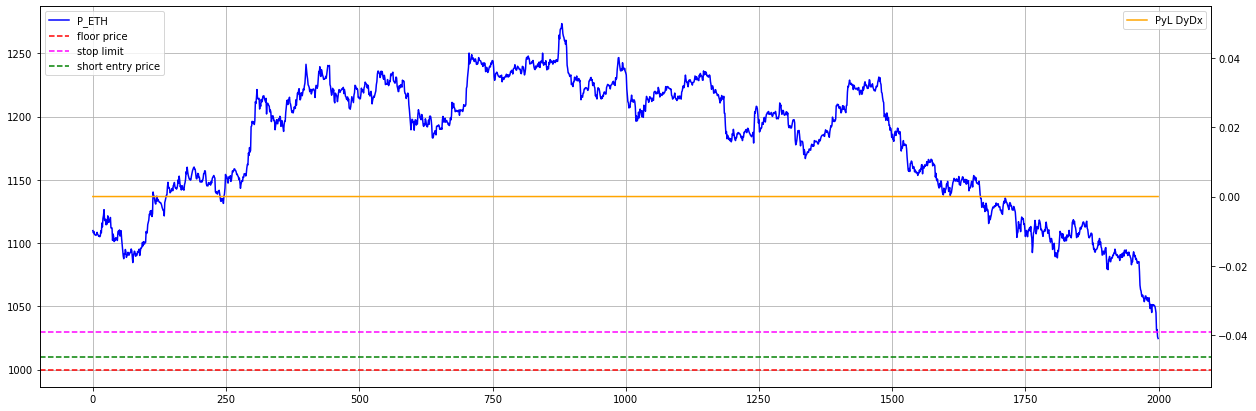

In [ ]:
fig, axs = plt.subplots(1,1, figsize = (21, 7))
axs.plot(list(summary['market_price']), label = 'P_ETH', c = 'blue')
axs.axhline(y = floor_price, color = 'r', linestyle = '--', label = 'floor price')
axs.axhline(y = stop_limit, color = 'magenta', linestyle = '--', label = 'stop limit')
axs.axhline(y = short_entry_price, color = 'green', linestyle = '--', label = 'short entry price')
axs.grid()
axs.legend(loc = 'upper left')
axs_ = axs.twinx()
axs_.plot(list(summary['PyL DyDx']), label = 'PyL DyDx', c = 'orange')
axs_.legend(loc = 'upper right')

In [ ]:
P = np.linspace(0.01, 5, 10)
collateral_usd = 1500
USDC_borrowed = collateral_usd * 0.1
plt.plot(P, LTV_(collateral*P, P, USDC_borrowed))

NameError: ignored